# using simple KERAS to do unsupervised learning with AutoEncoders

In [1]:
from keras.layers import Input,Dense
from keras.models import Model

Using TensorFlow backend.
C:\Users\obaid\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\obaid\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\obaid\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\obaid\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
### we will use MNIST data set. Each image is 784 vector length. 
## it will be compressed with factor of 24.5 
## that makes our input dimension to be 32
encoding_dim = 32

In [3]:
### our input image 
input_img = Input(shape=(784,))
### encoded is the encoded representation of the input

encoded = Dense(encoding_dim,activation='relu')(input_img)
## decode 
decoded = Dense(784,activation='sigmoid')(encoded)

In [4]:
##this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

SIMPLE ENCODER MODEL

In [5]:
## this model maps an input to its reconstruction
encoder= Model(input_img,encoded)

SIMPLE DECODER MODEL

In [6]:
### create a splaceholder for an encoded (32-dim) input
encoded_input = Input(shape=(encoding_dim,))
### retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1] ### last layer
### create the decodermodel
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

# Read in Data

In [8]:
from keras.datasets import mnist
import numpy as np 
(x_train, _),(x_test, _)= mnist.load_data()

In [11]:
x_train = x_train.astype('float32') /255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Fit an autoencoder model

In [12]:
autoencoder.fit(x_train,x_train,  ## notice that there is no y -train as x-train is the y_train
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))  

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.6431 - val_loss: 0.5252
Epoch 2/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.2042 - val_loss: 0.0423
Epoch 3/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.0228 - val_loss: 0.0127
Epoch 4/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.0091 - val_loss: 0.0066
Epoch 5/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0053 - val_loss: 0.0043
Epoch 6/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0036 - val_loss: 0.0031
Epoch 7/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0027 - val_loss: 0.0024
Epoch 8/50
60000/60000 [==============================] - 3s 51us/step - loss: 0.0021 - val_loss: 0.0019
Epoch 9/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.0018 - val_loss: 0.0016
Epoch

In [13]:
### encode and decode some digits
## note that we take them from the test set

encoded_imgs=encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Plot images

In [14]:
import matplotlib.pyplot as plt

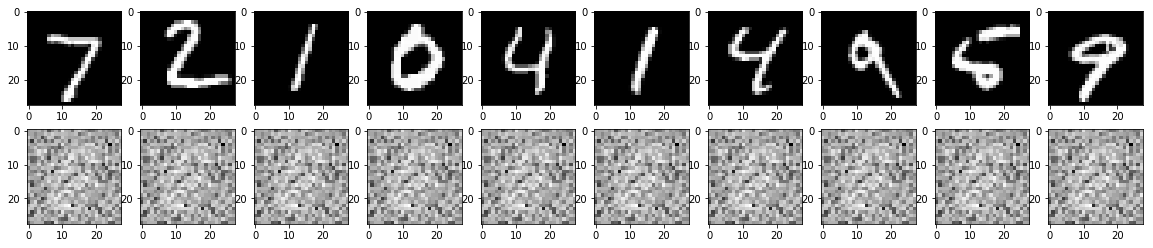

In [18]:
n = 10  ## how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
    # display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    # display the constructed images
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
plt.show()